## Problem 1A:

In [1]:
#Import the basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
%matplotlib inline
import scipy.stats as stats
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [2]:
os.getcwd()

'C:\\Users\\l\\Downloads'

In [3]:
os.chdir('C:\\Users\\l\\Downloads')

In [4]:
#Read the data
df=pd.read_csv('SalaryData.csv')

In [5]:
#Check the first few observations
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [6]:
#Check the discription
df.describe()

,Salary
count,40.000000
mean,162186.875000
std,64860.407506
min,50103.000000
25%,99897.500000
50%,169100.000000
75%,214440.750000
max,260151.000000


In [7]:
#Check the appropriateness of datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [8]:
df.shape

(40, 3)

In [9]:
#Check for presence of missing values in each feature
df.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

In [10]:
df.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [11]:
df.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

In [12]:
#Check for presence of duplicate rows
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Education,Occupation,Salary


In [13]:
df.columns

Index(['Education', 'Occupation', 'Salary'], dtype='object')

## 1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually


 Formulation of hypothesis for conducting one-way ANOVA for education qualification w.r.t salary
 
   H0: Salary depend on education qualification 
 
 Ha: Salary does not depend on education
 
 Confidence level = 0.05
 
 Formulation of hypothesis for conducting one-way ANOVA for occupation w.r.t salary
 
 H0: Salary depend on occupation 
 
 Ha: Salary does not depend on occupation
 
 Confidence level = 0.05

## 1.2 Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

## One-way ANOVA of 'Education' variable with the 'Salary' variable.

𝐻0 : The means of 'Education' variable with respect to each Salary is equal.

𝐻1 : At least one of the means of 'Education' variable with respect to each Salary is unequal.

In [14]:
formula = 'Salary ~ C(Education)' ## y = f(X)
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


## Since the p value in this scenario is less than 𝛼(0.05), we can reject the Null Hypothesis (𝐻0) & conclude that there is a difference in the means of ‘Education’ variable w.r.t Salary is unequal.

## 1.3 Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

## One-way ANOVA of 'Occupation' variable with the 'Salary' variable.

𝐻0 : The means of 'Occupation' variable with respect to each Salary is equal.

𝐻1 : At least one of the means of 'Occupation' variable with respect to each Salary is unequal.

In [15]:
formula = 'Salary ~ C(Occupation)' ## y = f(X)
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


## Since the p value in this scenario is greater than 𝛼(0.05), we can say that we fail to reject the Null Hypothesis (𝐻0).

## 1.4 If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. 

The Null Hypothesis is rejected in Scenario Education .We can also check class mean are different due to difference in the group means by using Tukeyhsd( ) function in Python

In [16]:
from statsmodels.stats.multicomp import MultiComparison

In [17]:
mcomp = MultiComparison(df['Salary'], df['Education'])
print(mcomp.tukeyhsd().summary())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


## Problem 1B:

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
%matplotlib inline
import scipy.stats as stats

In [19]:
#Read the data
df=pd.read_csv('SalaryData.csv')

In [20]:
# Check the first few observations
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


## 1.5 What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

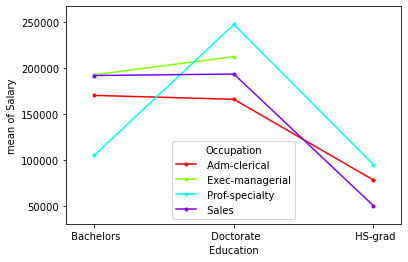

In [21]:
fig=interaction_plot(x=df['Education'],trace=df['Occupation'],response=df['Salary'])

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

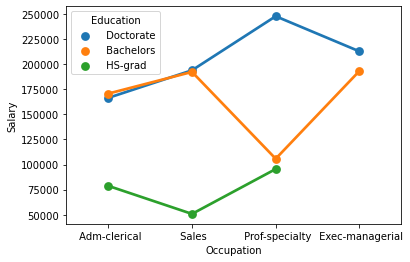

In [22]:
sns.pointplot(x='Occupation',y='Salary',data=df,hue='Education',ci=None)

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

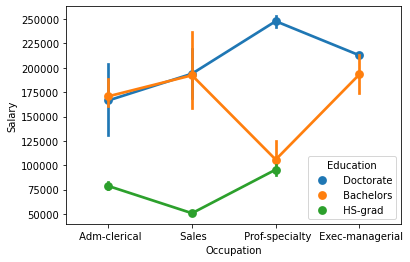

In [23]:
sns.pointplot(x='Occupation',y='Salary',data=df,hue='Education')

## 1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

In [24]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
C(Occupation),3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
C(Education):C(Occupation),6.0,3.634909e+10,6.058182e+09,8.519815,2.232500e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


Hypothesis Set1: 
    
H0 : The Mean Salary for different levels of Educations are equal.
    
H1 : The Mean Salary are not equal, for at least one level of Education.
    
We see that the p-value (0) for Education is less than significance (0.05) level so we reject the null hypothesis and can conclude that the mean salary for different levels of Education are not equal.
    
Hypothesis Set2:
        
H0 : The Mean Salary for different levels of Occupation are equal.
        
H1 : The Mean Salary are not equal, for at least one level of Occupation.
    
We see that the p-value (0.07) for Education is more than significance (0.05) level so we fail to reject the null hypothesis.
            
Hypothesis Set3:
                
H0 : There is no interaction between Education and Occupation.
                    
H1 : There is an interaction between Education and Occupation.
            
We see that the p-value (0) for Education: Occupation is less than significance (0.05) level so we reject the null hypothesis and can conclude that there is some interaction between the two variables

## 1.7 Explain the business implications of performing ANOVA for this particular case study.

Education is more important for Salary rather than Occupation and a combination of Education & Occupation.

## Problem 2:

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [26]:
#Read the data
df=pd.read_csv('Education+-+Post+12th+Standard.csv')

In [27]:
#Check the first few observations
df.head().T

,0,1,2,3,4
Names,Abilene Christian University,Adelphi University,Adrian College,Agnes Scott College,Alaska Pacific University
Apps,1660,2186,1428,417,193
Accept,1232,1924,1097,349,146
Enroll,721,512,336,137,55
Top10perc,23,16,22,60,16
Top25perc,52,29,50,89,44
F.Undergrad,2885,2683,1036,510,249
P.Undergrad,537,1227,99,63,869
Outstate,7440,12280,11250,12960,7560
Room.Board,3300,6450,3750,5450,4120


In [28]:
#Check the last few observations
df.tail()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
772,Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99
776,York College of Pennsylvania,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99


In [29]:
#Check the discription
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [30]:
#Check the appropriateness of datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [31]:
df.drop(labels='Names',axis= 1,inplace=True)
df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [32]:
#Check the appropriateness of datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    int64  
 1   Accept       777 non-null    int64  
 2   Enroll       777 non-null    int64  
 3   Top10perc    777 non-null    int64  
 4   Top25perc    777 non-null    int64  
 5   F.Undergrad  777 non-null    int64  
 6   P.Undergrad  777 non-null    int64  
 7   Outstate     777 non-null    int64  
 8   Room.Board   777 non-null    int64  
 9   Books        777 non-null    int64  
 10  Personal     777 non-null    int64  
 11  PhD          777 non-null    int64  
 12  Terminal     777 non-null    int64  
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    int64  
 15  Expend       777 non-null    int64  
 16  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16)
memory usage: 103.3 KB


In [33]:
df.shape

(777, 17)

In [34]:
## Checking the column names
df.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

## 2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

## Univariate Analysis

Let us define a function 'univariateAnalysis_numeric' to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments.

The function will display the statistical description of the the numeric variable, histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.



Apps
Skew : 3.72


C:\Users\l\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\l\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


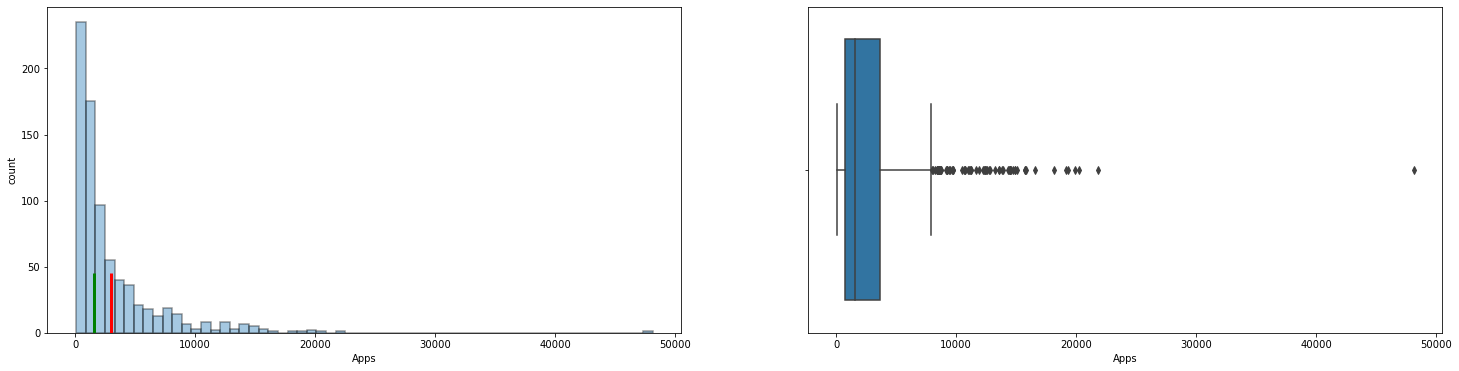

Accept
Skew : 3.42


C:\Users\l\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\l\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


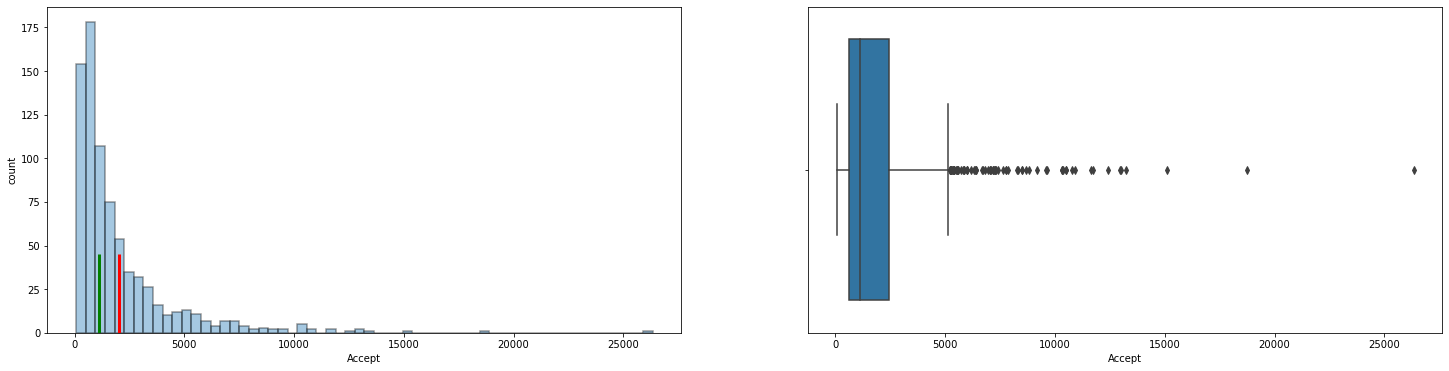

C:\Users\l\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\l\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Enroll
Skew : 2.69


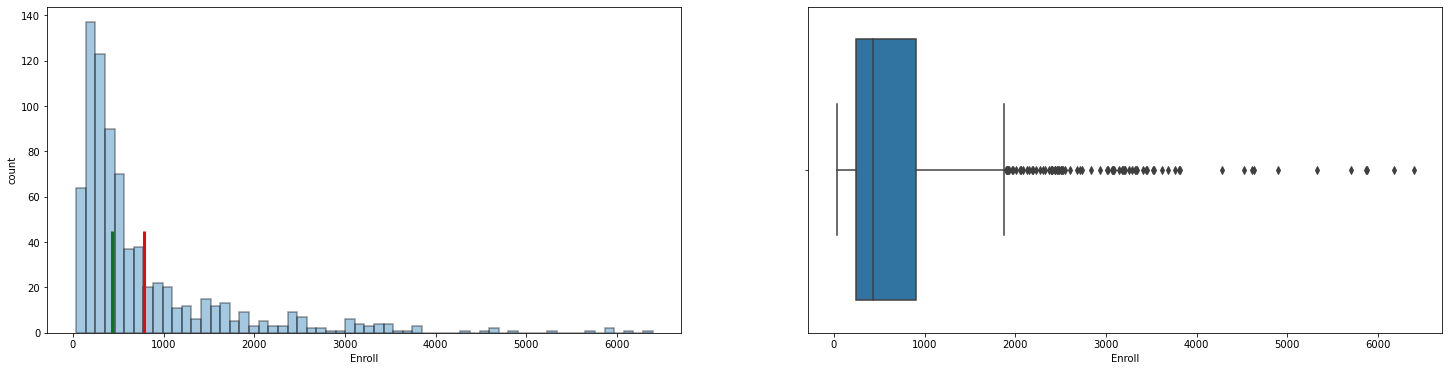

Top10perc
Skew : 1.41


C:\Users\l\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\l\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


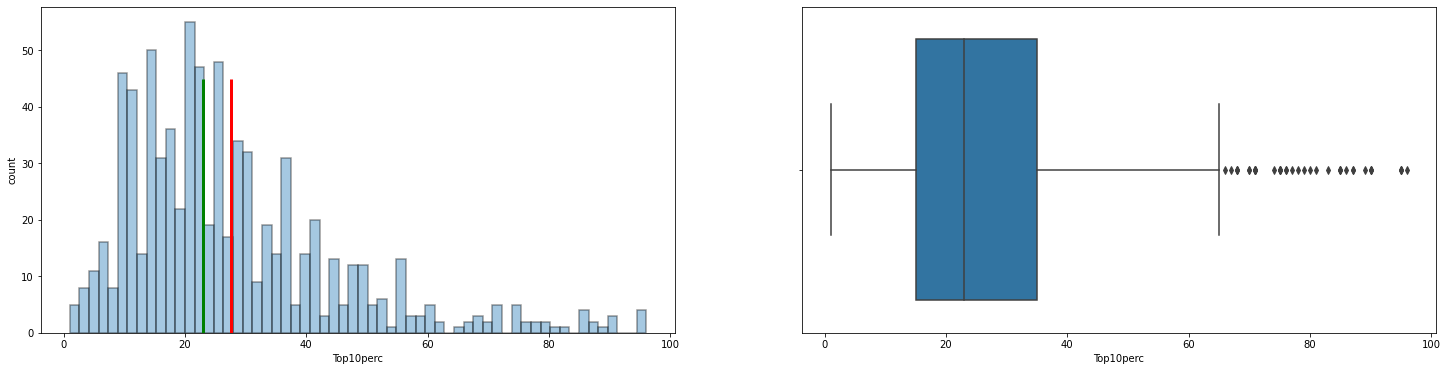

C:\Users\l\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Top25perc
Skew : 0.26


C:\Users\l\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


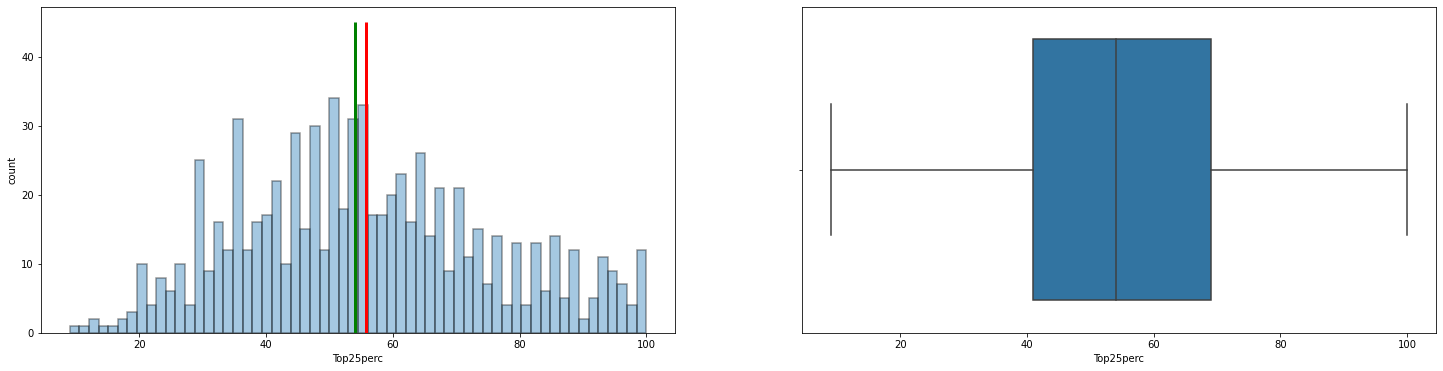

F.Undergrad
Skew : 2.61


C:\Users\l\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\l\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


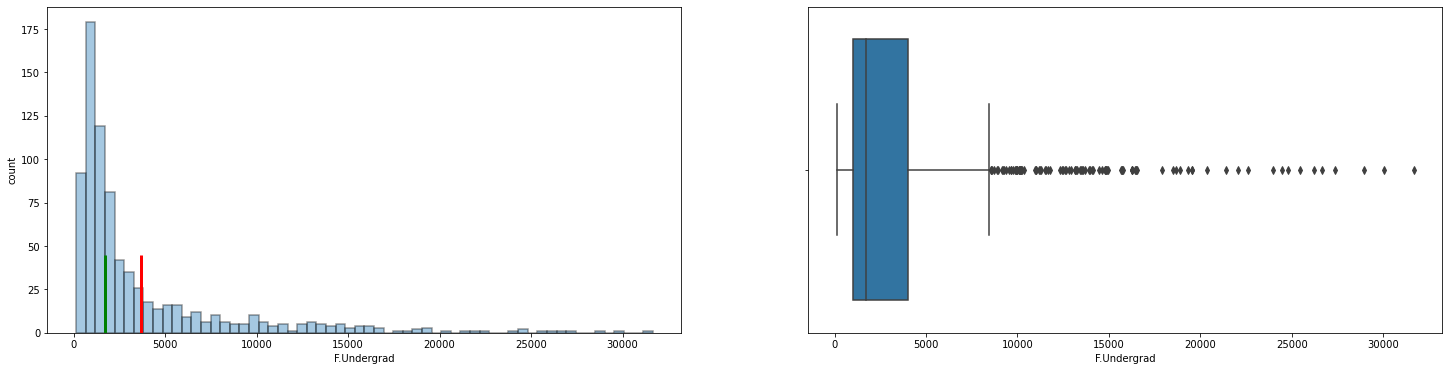

P.Undergrad
Skew : 5.69


C:\Users\l\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\l\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


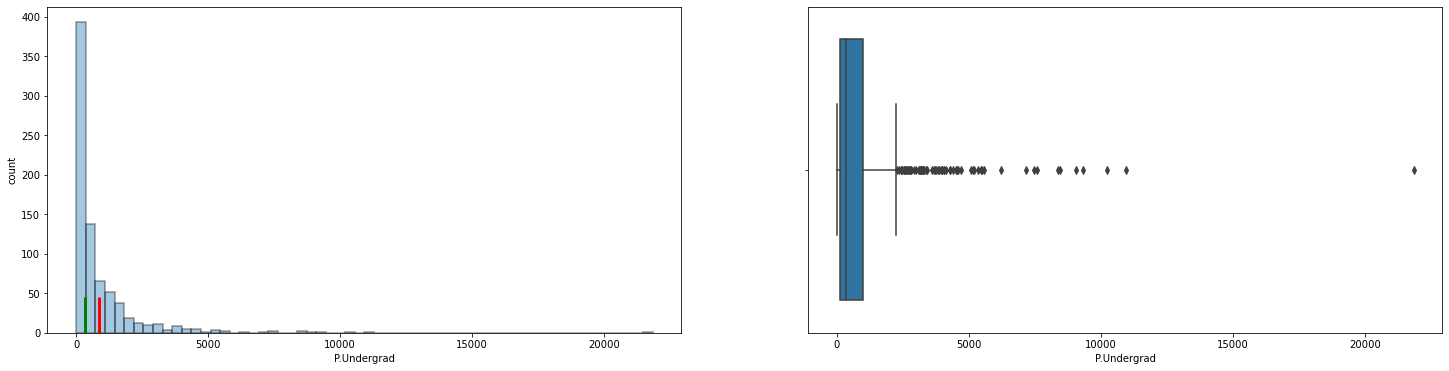

Outstate
Skew : 0.51


C:\Users\l\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\l\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


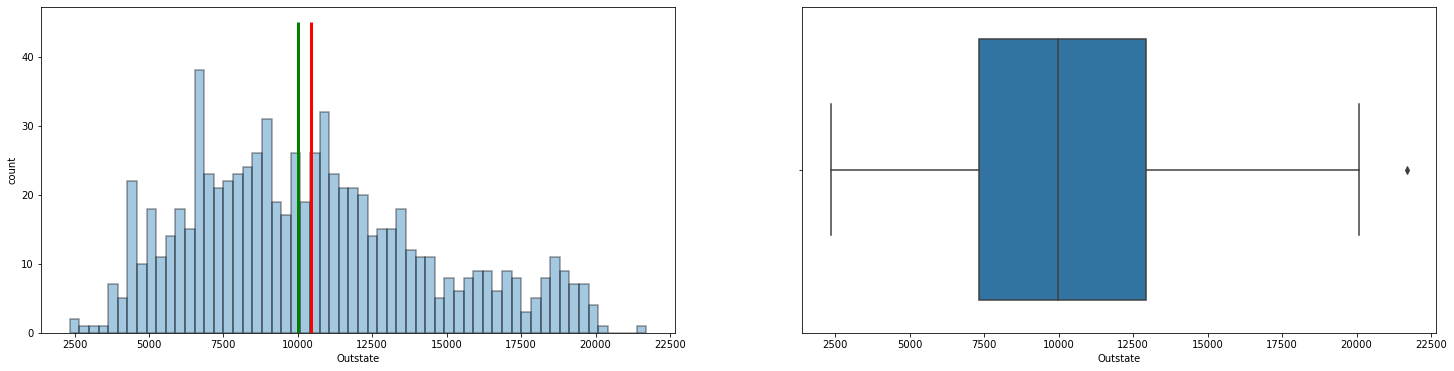

Room.Board
Skew : 0.48


C:\Users\l\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\l\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


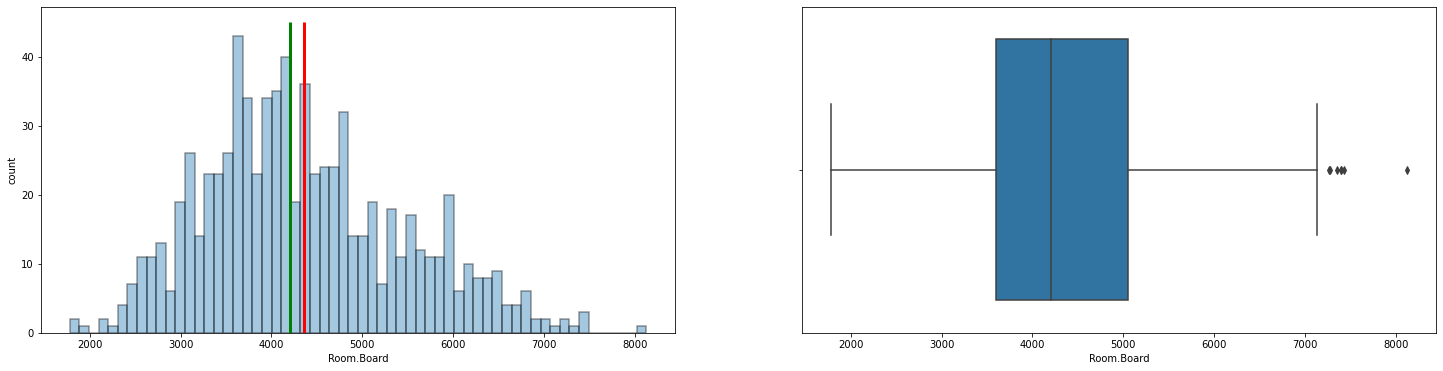

C:\Users\l\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\l\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Books
Skew : 3.49


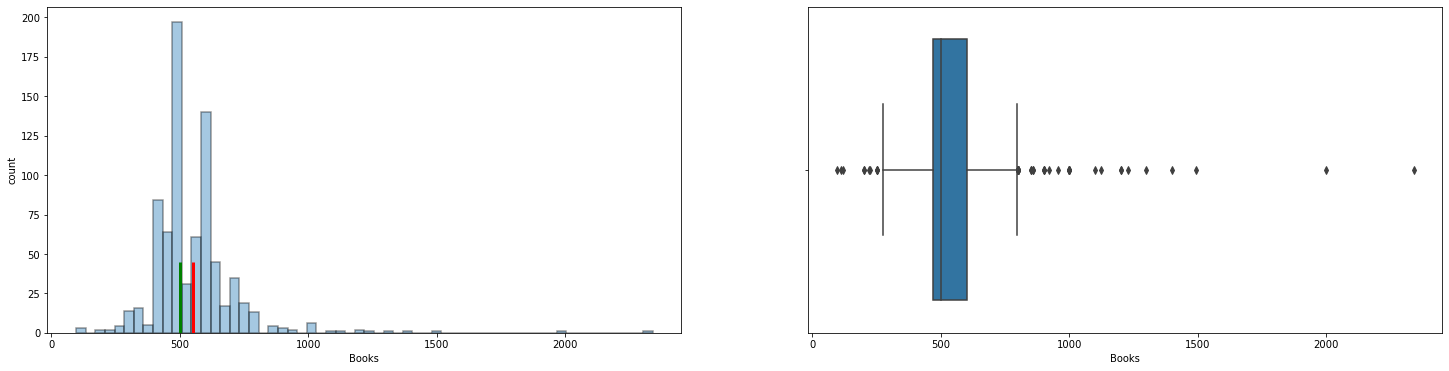

Personal
Skew : 1.74


C:\Users\l\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\l\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


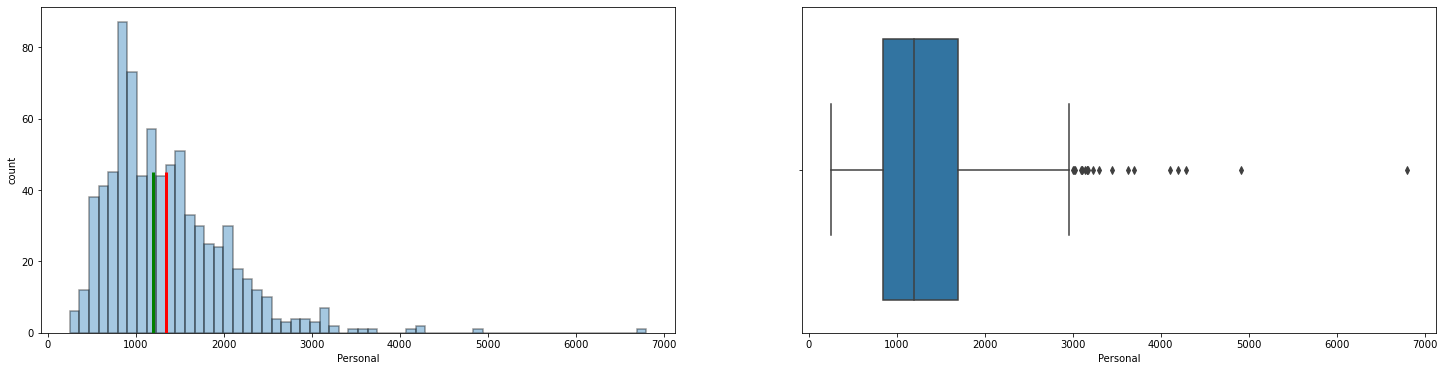

PhD
Skew : -0.77


C:\Users\l\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\l\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


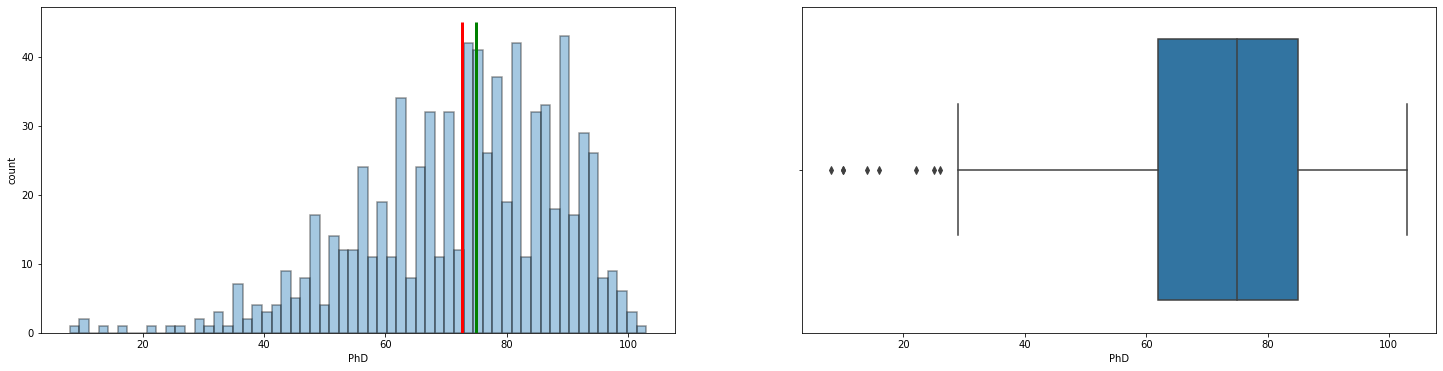

Terminal
Skew : -0.82


C:\Users\l\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\l\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


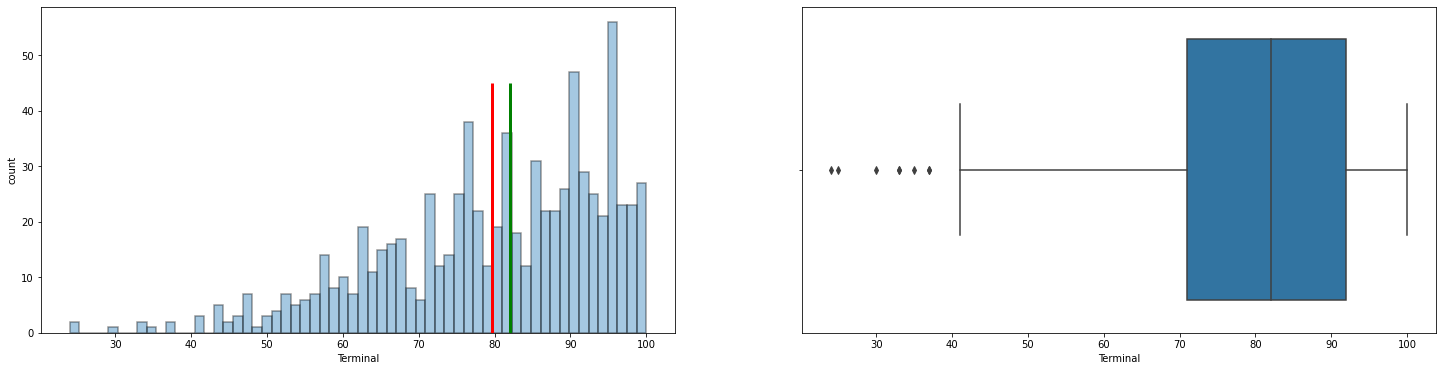

C:\Users\l\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\l\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


S.F.Ratio
Skew : 0.67


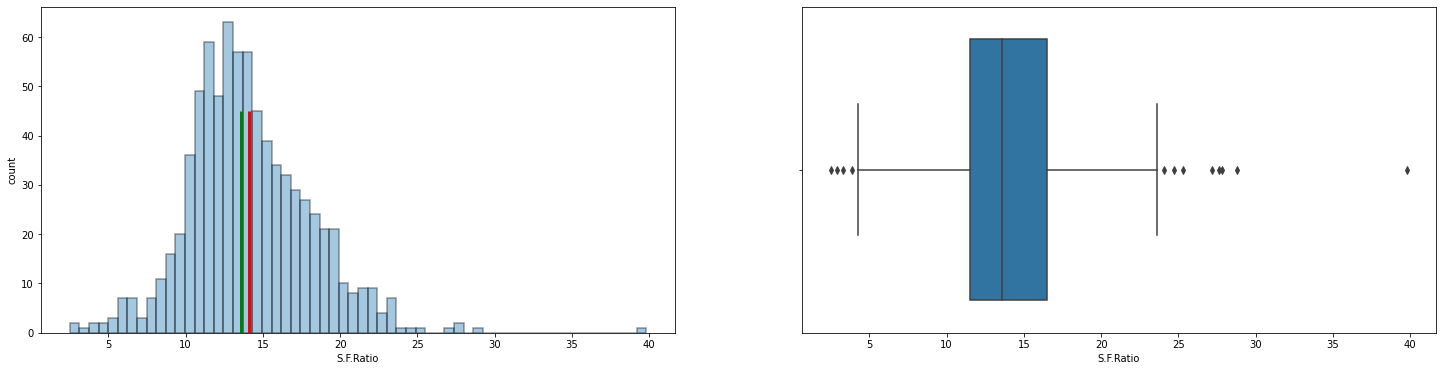

perc.alumni
Skew : 0.61


C:\Users\l\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\l\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


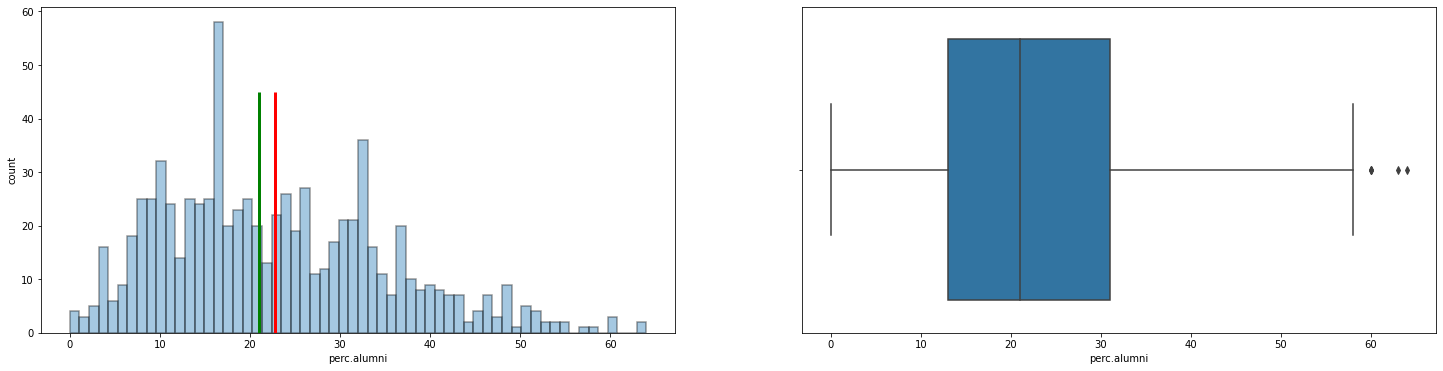

Expend
Skew : 3.46


C:\Users\l\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\l\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


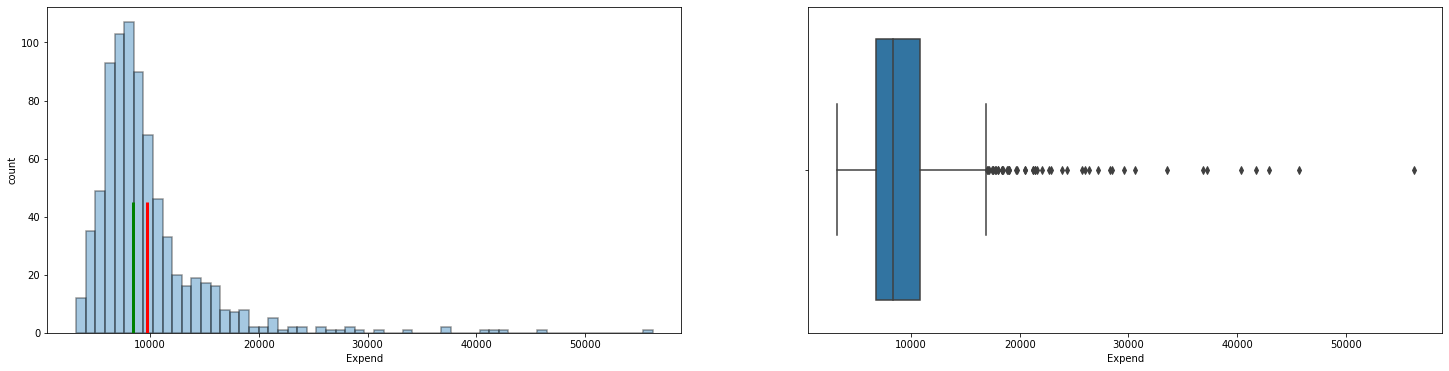

Grad.Rate
Skew : -0.11


C:\Users\l\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\l\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


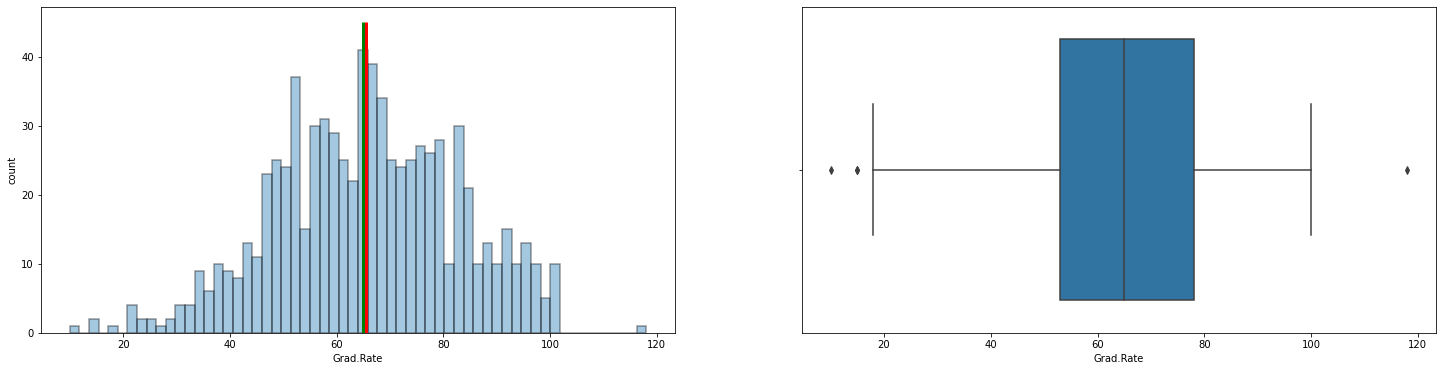

In [35]:
cont_cols=list(df.columns)
for col in cont_cols:
    print(col)
    print('Skew :',np.round(df[col].skew(),2))
    plt.figure(figsize=(25,6))
    plt.subplot(1,2,1)
    sns.distplot(df[col],norm_hist=False,kde=False,bins=60,hist_kws=dict(edgecolor='black',linewidth=1.5))
    plt.vlines(df[col].mean(),ymin=0,ymax=45,color='red',linewidth=3)
    plt.vlines(df[col].median(),ymin=0,ymax=45,color='green',linewidth=3)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.show()

## Bivariate Analysis

## Correlation Heatmap

<AxesSubplot:>

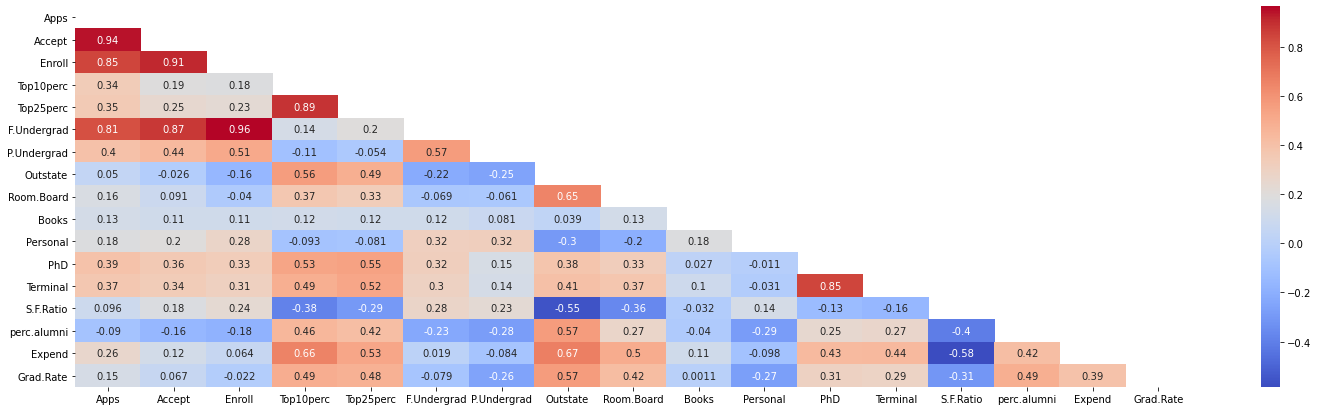

In [36]:
plt.figure(figsize=(25 ,7))
mask=np.triu(np.ones_like(df.corr(),dtype=bool))
sns.heatmap(df.corr(),annot=True,mask=mask,cmap='coolwarm')

We can see high positive correlation among following variables

1. Apps and Accept
2. Apps and Enroll
3. Apps and FUndergrad
4. Accept and Enroll
5. Accept and FUndergrad
6. Enroll and FUndergrad
7. Top10perc and Top25perc
8. PhD and Terminal

## 2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.

PCA is impacted by scaling.Often the variables of the data set are of different scales i.e. one variable is in millions and other in only 100.

Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.

In this method, we convert variables with different scales of measurements into a single scale.

StandardScaler normalizes the data using the formula (x-mean)/standard deviation.

We will be doing this only for the numerical variables.

In [37]:
## Variance of Unscaled data
np.round(np.var(df,ddof=1),2)

Apps           14978459.53
Accept          6007959.70
Enroll           863368.39
Top10perc           311.18
Top25perc           392.23
F.Undergrad    23526579.33
P.Undergrad     2317798.85
Outstate       16184661.63
Room.Board      1202743.03
Books             27259.78
Personal         458425.75
PhD                 266.61
Terminal            216.75
S.F.Ratio            15.67
perc.alumni         153.56
Expend         27266865.64
Grad.Rate           295.07
dtype: float64

In [38]:
#Scale the data
from scipy.stats import zscore
df=pd.DataFrame(zscore(df,ddof=1),columns=cont_cols)
df.head().T

,0,1,2,3,4
Apps,-0.346659,-0.210748,-0.406604,-0.667830,-0.725709
Accept,-0.320999,-0.038678,-0.376076,-0.681243,-0.764063
Enroll,-0.063468,-0.288398,-0.477814,-0.691982,-0.780232
Top10perc,-0.258416,-0.655234,-0.315105,1.839046,-0.655234
Top25perc,-0.191704,-1.353040,-0.292690,1.676532,-0.595647
F.Undergrad,-0.168008,-0.209653,-0.549212,-0.657656,-0.711466
P.Undergrad,-0.209072,0.244150,-0.496770,-0.520416,0.009000
Outstate,-0.745875,0.457202,0.201175,0.626229,-0.716047
Room.Board,-0.964284,1.907979,-0.553960,0.996150,-0.216584
Books,-0.601924,1.215097,-0.904761,-0.601924,1.517934


## 2.3 Comment on the comparison between the covariance and the correlation matrices from this data.[on scaled data]

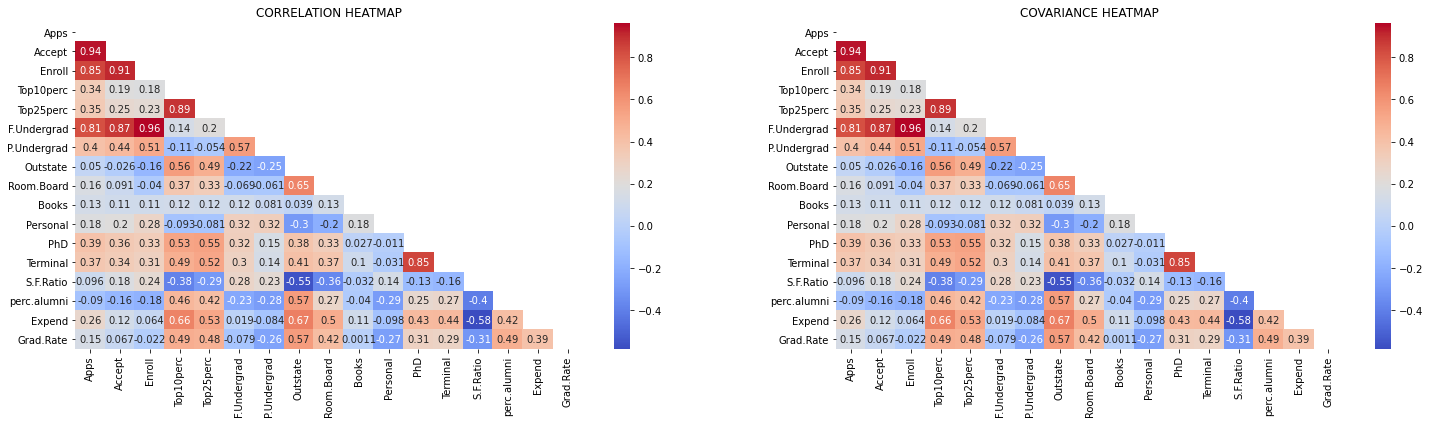

In [39]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25 ,6))
mask=np.triu(np.ones_like(df.corr(),dtype=bool))
sns.heatmap(df.corr(),annot=True,mask=mask,ax=ax1,cmap='coolwarm')
ax1.title.set_text("CORRELATION HEATMAP")
mask=np.triu(np.ones_like(df.cov(),dtype=bool))
sns.heatmap(df.cov(),annot=True,mask=mask,ax=ax2,cmap='coolwarm')
ax2.title.set_text("COVARIANCE HEATMAP")
plt.show()

H0: All variables in the data are uncorrelated

Ha: At least one pair of variables in the data are correlated

If the null hypothesis cannot be rejected, then PCA is not advisable.


If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended.

In [40]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
p_value

0.0

The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [41]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.8131251200373503

## 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?

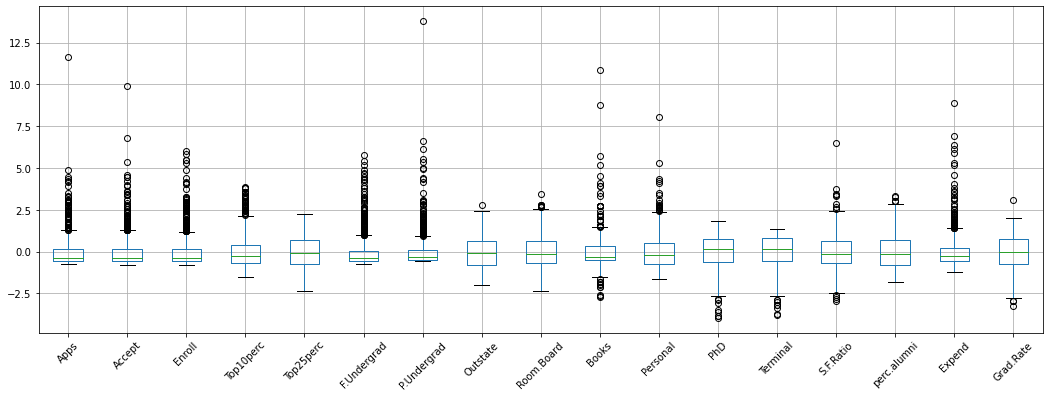

In [42]:
df.boxplot(figsize=(18,6))
plt.xticks(rotation=45)
plt.show()

In [43]:
#Check the number of features
len(df.columns)

17

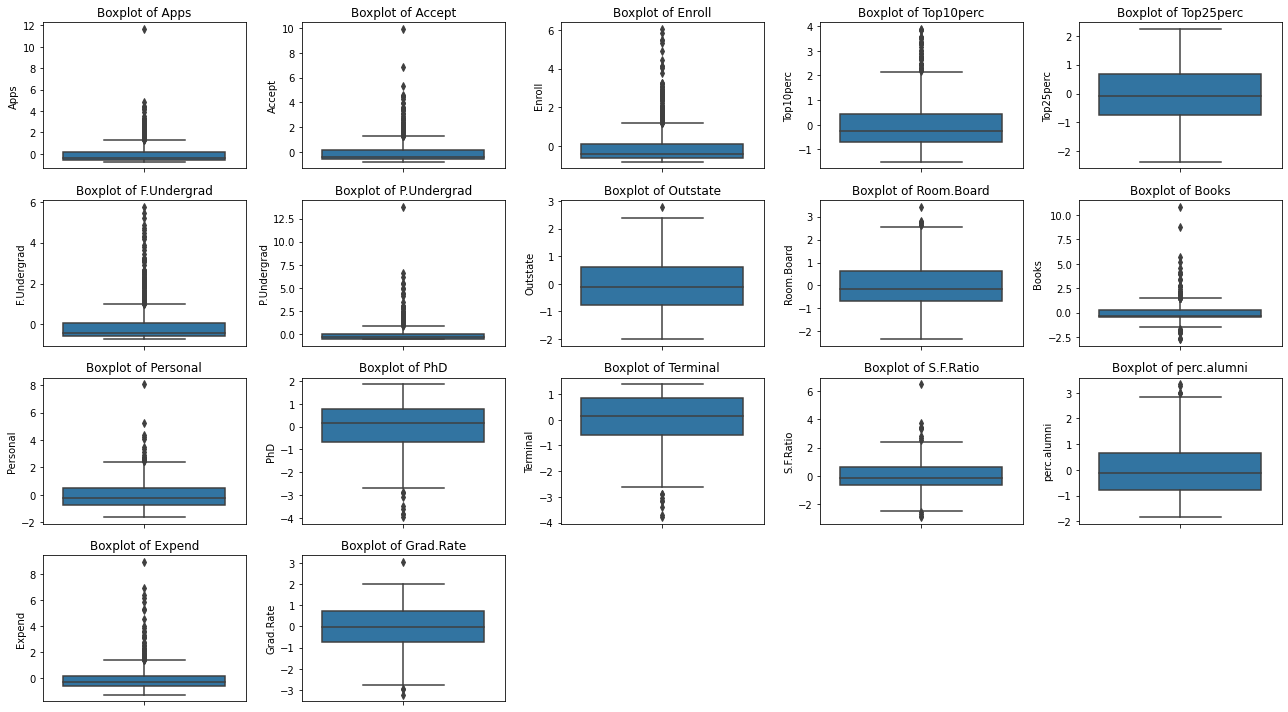

In [44]:
#Check for presence of outliers in each feature
plt.figure(figsize = (18,10))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [45]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
#def remove_outlier(col):
    #Q1,Q3=col.quantile([0.25,0.75])
    #IQR=Q3-Q1
    #lower_range= Q1-(1.5 * IQR)
    #upper_range= Q3+(1.5 * IQR)
    #return lower_range, upper_range 

In [46]:
#Cap & floor the values beyond the outlier boundaries
#for i in feature_list:
    #LL, UL = remove_outlier(df[i])
    #df[i] = np.where(df[i] > UL, UL, df[i])
    #df[i] = np.where(df[i] < LL, LL, df[i])

In [47]:
#Check to verify if outliers have been treated
#plt.figure(figsize = (18,8))
#feature_list = df.columns
#for i in range(len(feature_list)):
    #plt.subplot(4, 5, i + 1)
    #sns.boxplot(y = df[feature_list[i]], data = df)
    #plt.title('Boxplot of {}'.format(feature_list[i]))
    #plt.tight_layout()

## 2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features.

In [48]:
pc_comps = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12','PC13','PC14','PC15','PC16','PC17']
cov_matrix = np.cov(df.T)
eigen_values,eigen_vectors_trnspsd = np.linalg.eig(cov_matrix)
pcs = eigen_vectors_trnspsd.T
pc_df_numpy = pd.DataFrame(np.round(pcs,2),index=pc_comps,columns=cont_cols)
pc_df_numpy.head(17)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
PC1,-0.25,-0.21,-0.18,-0.35,-0.34,-0.15,-0.03,-0.29,-0.25,-0.06,0.04,-0.32,-0.32,0.18,-0.21,-0.32,-0.25
PC2,0.33,0.37,0.40,-0.08,-0.04,0.42,0.32,-0.25,-0.14,0.06,0.22,0.06,0.05,0.25,-0.25,-0.13,-0.17
PC3,0.06,0.10,0.08,-0.04,0.02,0.06,-0.14,-0.05,-0.15,-0.68,-0.50,0.13,0.07,0.29,0.15,-0.23,0.21
PC4,-0.28,-0.27,-0.16,0.05,0.11,-0.10,0.16,-0.13,-0.18,-0.09,0.23,0.53,0.52,0.16,-0.02,-0.08,-0.27
PC5,0.01,0.06,-0.06,-0.40,-0.43,-0.04,0.30,0.22,0.56,-0.13,-0.22,0.14,0.20,-0.08,-0.22,0.08,-0.11
PC6,0.02,-0.01,0.04,0.05,-0.03,0.04,0.19,0.03,-0.16,-0.64,0.33,-0.09,-0.15,-0.49,0.05,0.30,-0.22
PC7,0.04,0.01,0.03,0.16,0.12,0.03,-0.06,-0.11,-0.21,0.15,-0.63,0.00,0.03,-0.22,-0.24,0.23,-0.56
PC8,0.10,0.06,-0.06,0.12,0.10,-0.08,-0.57,-0.01,0.22,-0.21,0.23,0.08,0.01,0.08,-0.68,0.05,0.01
PC9,0.09,0.18,0.13,-0.34,-0.40,0.06,-0.56,0.00,-0.28,0.13,0.09,0.19,0.25,-0.27,0.26,0.05,-0.04
PC10,-0.05,-0.04,-0.03,-0.06,-0.01,-0.02,0.22,-0.19,-0.30,0.08,-0.14,0.12,0.09,-0.47,-0.42,-0.13,0.59


In [49]:
pc_df_numpy.loc['PC1',:].index

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

## 2.5 Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]

In [50]:
pc_comps = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12','PC13','PC14','PC15','PC16','PC17']
cov_matrix = np.cov(df.T)
eigen_values,eigen_vectors_trnspsd = np.linalg.eig(cov_matrix)
pcs = eigen_vectors_trnspsd.T
pc_df_numpy = pd.DataFrame(np.round(pcs,2),index=pc_comps,columns=cont_cols)
pc_df_numpy.head(4)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
PC1,-0.25,-0.21,-0.18,-0.35,-0.34,-0.15,-0.03,-0.29,-0.25,-0.06,0.04,-0.32,-0.32,0.18,-0.21,-0.32,-0.25
PC2,0.33,0.37,0.40,-0.08,-0.04,0.42,0.32,-0.25,-0.14,0.06,0.22,0.06,0.05,0.25,-0.25,-0.13,-0.17
PC3,0.06,0.10,0.08,-0.04,0.02,0.06,-0.14,-0.05,-0.15,-0.68,-0.50,0.13,0.07,0.29,0.15,-0.23,0.21
PC4,-0.28,-0.27,-0.16,0.05,0.11,-0.10,0.16,-0.13,-0.18,-0.09,0.23,0.53,0.52,0.16,-0.02,-0.08,-0.27


In [51]:
#Extract eigen values
np.round(eigen_values,2)

array([5.44, 4.48, 1.17, 1.01, 0.93, 0.85, 0.61, 0.59, 0.53, 0.4 , 0.02,
       0.04, 0.31, 0.09, 0.14, 0.17, 0.22])

In [52]:
#Extract eigen vectors
np.round(eigen_vectors_trnspsd,2)

array([[-0.25,  0.33,  0.06, -0.28,  0.01,  0.02,  0.04,  0.1 ,  0.09,
        -0.05,  0.36, -0.46,  0.04, -0.13,  0.08, -0.6 ,  0.02],
       [-0.21,  0.37,  0.1 , -0.27,  0.06, -0.01,  0.01,  0.06,  0.18,
        -0.04, -0.54,  0.52, -0.06,  0.15,  0.03, -0.29, -0.15],
       [-0.18,  0.4 ,  0.08, -0.16, -0.06,  0.04,  0.03, -0.06,  0.13,
        -0.03,  0.61,  0.4 , -0.07, -0.03, -0.09,  0.44,  0.01],
       [-0.35, -0.08, -0.04,  0.05, -0.4 ,  0.05,  0.16,  0.12, -0.34,
        -0.06, -0.14,  0.15, -0.01, -0.7 , -0.11, -0.  ,  0.04],
       [-0.34, -0.04,  0.02,  0.11, -0.43, -0.03,  0.12,  0.1 , -0.4 ,
        -0.01,  0.08, -0.05, -0.27,  0.62,  0.15, -0.02, -0.09],
       [-0.15,  0.42,  0.06, -0.1 , -0.04,  0.04,  0.03, -0.08,  0.06,
        -0.02, -0.41, -0.56, -0.08, -0.01, -0.06,  0.52,  0.06],
       [-0.03,  0.32, -0.14,  0.16,  0.3 ,  0.19, -0.06, -0.57, -0.56,
         0.22,  0.01,  0.05,  0.1 , -0.02,  0.02, -0.13, -0.06],
       [-0.29, -0.25, -0.05, -0.13,  0.22,  0.03

## 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

(-0.25)*Apps+(-0.21)*Accept+(-0.18)*Enroll+(-0.35)*Top10perc+(-0.34)*Top25perc+(-0.15)*FUndergrad+(-0.03)*PUndergrad+(-0.29)*Outstate+(-0.25)*RoomBoard+(-0.06)*Books+(0.04)*Personal+(-0.32)*PhD+(-0.32)*Terminal+(0.18)*SFRatio+(-0.21)*Percalumni+(-0.32)*Expend+(-0.25)*GradRate

## 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [53]:
#Check the Explained Variance
tot = np.sum(eigen_values)
var_exp = [( i /tot ) * 100 for i in sorted(eigen_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Explained variance by each principal Component : \n",np.round(var_exp,2))

Explained variance by each principal Component : 
 [32.02 26.34  6.9   5.92  5.49  4.98  3.56  3.45  3.12  2.38  1.84  1.3
  0.99  0.85  0.52  0.22  0.14]


In [54]:
#Check the cumlative explained variance 
print("Cumulative Variance Explained : \n",np.round(cum_var_exp,2))

Cumulative Variance Explained : 
 [ 32.02  58.36  65.26  71.18  76.67  81.66  85.22  88.67  91.79  94.16
  96.    97.3   98.29  99.13  99.65  99.86 100.  ]


Text(0, 0.5, '% cumulative Variance Explained')

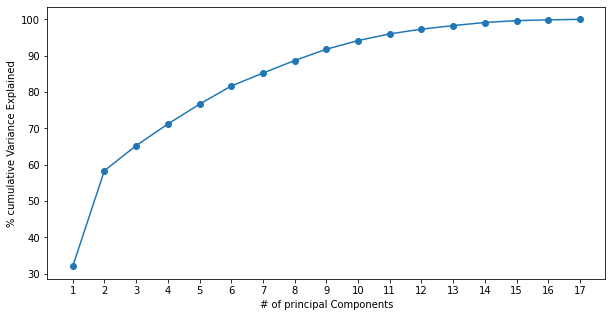

In [55]:
# View Scree Plot to identify the number of components to be built
plt.figure(figsize=(10,5))
plt.plot(cum_var_exp,marker='o')
plt.xticks(np.arange(0,17),labels=np.arange(1,18))
plt.xlabel('# of principal Components')
plt.ylabel('% cumulative Variance Explained')

## 2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

# Component Summaries

# First Principal Component-PC1

The First principal component is a measure of the quality of Apps,Top10perc,Top25perc,Terminal,PhD.This component is associated with high scores on all of these variables.They are all positively related to PC1 since they all have positive signs.

# Second Principal Component-PC2

The Second Principal Component is a measure of the Accept,Enrollment,F.Undergrad,P.Undergrad,Outstate,percalumni.PC2 is associated with high scores of F.Undergrad and Enrollment.

# Third Principal Component-PC3

The Third Principal Component is a measure of the Books cost and Personal Spending of the student.

# Fourth Principal Component-PC4

The Fourth Principal Component is a measure of the Cost of Boarding.PC4 is associated with high scores of Cost Boarding with low rating of Personal spending and faculties with PhD.


# Decision regarding which correlation value is high may vary from case to case. In this we have taken 25-30% to be considerable magnitude irrespective of the sign.

# Principal components analysis is a very versatile technique and has its application in a number of situations.

## END